<a href="https://colab.research.google.com/github/darthfelipe21/Data_Scientist/blob/main/Pandas_Matplotlib_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5, 6. PANDAS DATAFRAME

**EJERCICIOS:**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


En primer lugar, será necesario que descarguéis del campus los datos que usaremos en estos ejercicios: el archivo csv llamado Pokemon.csv

Una vez tengáis descargado el archivo, subidlo al entorno de Colaboratory. Recordad que vimos como hacerlo mediante el menú de mano izquierda en los vídeos del primer tema para subirlo a local. Y que si preferís también tenéis la opción de guardar el archivo en vuestro Drive y montar una conexión a Drive para acceder a él.

Recordad que en cada pregunta, en caso de que lo necesitéis, podéis añadir las celdas de código que creáis conveniente.

1. Importa la librería de pandas y numpy

In [5]:
import pandas as pd
import numpy as np

2. Una vez hayas subido los datos con los que trabajaremos al entorno de Colab, importalos mediante la función read_csv y guárdalos en un dataframe llamado df

In [6]:
df= pd.read_csv('/content/Pokemon.csv')

3. Imprime las 10 primeras líneas de nuestro nuevo dataframe mediante la función head

In [7]:
df.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


4. Encuentra cuántas filas y columnas tiene df mediante la función shape

In [8]:
df.shape

(800, 13)

5. Obtén la información básica del dataframe mediante la función info. Fíjate en si hay alguna columna con elementos nulos, de que tipo son los datos de cada columna.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


6. Aplica la función drop_duplicates a df para eliminar duplicados si los hay. Luego imprime la shape del nuevo dataframe y mira si se han borrado duplicados. Si había duplicados, ahora debería haber menos filas en df.

In [10]:
df.drop_duplicates(inplace=True)
df.shape

(800, 13)

En el ejercicio anterior te debería haber salido que no hay duplicados. Pero si nos fijamos en el ejercicio 3, cuándo hemos imprimido las 10 primeras filas de df vemos que hay elementos que tienen el mismo id en la columna '#', como el pokemon con '#'==3. Esto es porque la función drop_duplicates elimina aquellos registros (filas) que tienen  el mismo valor **en todas las columnas** que otro registro.


Si queremos un dataset sin megaevoluciones, deberemos eliminar las filas que tienen el id repetido en la columna '#' y quedarnos solo con la primera aparición de ese id. Para ello usaremos la función drop_duplicates especificando el parámetro subset=['column_name'] donde column_name será el nombre de la columna con duplicados que queremos tomar como referencia. En este caso el column_name será #

7. Quédate con una versión de df sin megaevoluciones, es decir, si hay más de un pokemon con el mismo número en la columna # quédate solo con su primera aparición. Y guárdala en un dataframe llamado sub_df

In [11]:
sub_df= df.drop_duplicates(subset= ['#'])

8. Aplica la función head a sub_df para ver como ha quedado nuestro subdataset e imprime su shape para ver con cuántos registros nos hemos quedado.

In [12]:
print(sub_df.head(), sub_df.shape)

   #        Name Type 1  Type 2  Total  HP  Attack  Defense  Sp. Atk  Sp. Def  \
0  1   Bulbasaur  Grass  Poison    318  45      49       49       65       65   
1  2     Ivysaur  Grass  Poison    405  60      62       63       80       80   
2  3    Venusaur  Grass  Poison    525  80      82       83      100      100   
4  4  Charmander   Fire     NaN    309  39      52       43       60       50   
5  5  Charmeleon   Fire     NaN    405  58      64       58       80       65   

   Speed  Generation  Legendary  
0     45           1      False  
1     60           1      False  
2     80           1      False  
4     65           1      False  
5     80           1      False   (721, 13)


9. Aplica la función .nunique() a la columna '#' de df para ver cuántos valores únicos tenía. Este número deberá coincidir con el número de filas de sub_df

In [13]:
sub_df.nunique()

#             721
Name          721
Type 1         18
Type 2         18
Total         183
HP             94
Attack        100
Defense        97
Sp. Atk        94
Sp. Def        90
Speed         101
Generation      6
Legendary       2
dtype: int64

10. Haz que la columna # ahora sea el index de sub_df, aplica la función .set_index() con inplace=True

In [14]:
sub_df.set_index('#', inplace= True)

Aplica la función head a sub_df para ver que has establecido el índice correctamente. A partir de aquí trabajaremos siempre con sub_df a nos ser que se indicara lo contrario.

In [15]:
sub_df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False


11. Mira que columnas de sub_df tienen nulos y cuántos registros nulos tienen mediante la función isnull

In [16]:
sub_df.isnull().sum()


print(sub_df[sub_df.isnull().any(1)])


           Name  Type 1 Type 2  Total   HP  Attack  Defense  Sp. Atk  Sp. Def  \
#                                                                               
4    Charmander    Fire    NaN    309   39      52       43       60       50   
5    Charmeleon    Fire    NaN    405   58      64       58       80       65   
7      Squirtle   Water    NaN    314   44      48       65       50       64   
8     Wartortle   Water    NaN    405   59      63       80       65       80   
9     Blastoise   Water    NaN    530   79      83      100       85      105   
..          ...     ...    ...    ...  ...     ...      ...      ...      ...   
705     Sliggoo  Dragon    NaN    452   68      75       53       83      113   
706      Goodra  Dragon    NaN    600   90     100       70      110      150   
712    Bergmite     Ice    NaN    304   55      69       85       32       35   
713     Avalugg     Ice    NaN    514   95     117      184       44       46   
716     Xerneas   Fairy    N

12. Deberías haber obtenido que solamente tenemos nulos en la columna Type 2. Sustituye los nulos de Type 2 con la string 'No type 2', usa la función .fillna() y pásale un diccionario con key el nombre de la columna a la que queremos reemplazar los nulos, en este caso 'Type 2' y con value el valor por el que queremos reemplazar los nulos, en este caso 'No type 2'. Recuerda usar inplace=True para alterar el propio dataframe.

In [17]:
null_dict= {'Type 2': 'No type 2'}
sub_df.fillna(null_dict, inplace= True)

<ipython-input-17-9da59545a9a7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df.fillna(null_dict, inplace= True)


13. Imprime los nombres de las columnas. Luego renombra las columnas de manera que no contengan espacios y que todas sus letras sean minúsculas

In [18]:
print(sub_df.columns)

sub_df.columns= [col.replace(' ','') for col in sub_df]

sub_df.columns= [col.lower() for col in sub_df]

#sub_df.columns[col.lower().replace(' ', '') for col in sub_df]

sub_df.head()


Index(['Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')


,name,type1,type2,total,hp,attack,defense,sp.atk,sp.def,speed,generation,legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
4,Charmander,Fire,No type 2,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,No type 2,405,58,64,58,80,65,80,1,False


14. Cuántos pokemons legendarios hay en sub_df?

In [19]:
sub_df['legendary'].value_counts() 

sub_df['legendary'].sum()

46

15. Encuentra cuántos pokemons hay de cada type1 y haz que se muestren en pantalla en orden, del tipo del que hay más pokemons al que hay menos

In [20]:
conteo= sub_df['type1'].value_counts(sort=True)

conteo2= sub_df[['type1', 'name']].groupby('type1').count().sort_values(by= 'name', ascending = False)


16. Toma el código del ejercicio anterior, pero ahora guarda el resultado en un dataframe llamado pokemons_type1, que contenga type1 como índice y una columna llamada count donde se almacene la cuenta

In [21]:
pokemons_type1= pd.DataFrame({'count': conteo.values}, index=conteo.index)
pokemons_type1


,count
Water,105
Normal,93
Grass,66
Bug,63
Fire,47
Psychic,47
Rock,41
Electric,36
Ground,30
Poison,28


17. En base a los ejercicios anteriores, cuál es el tipo de pokemon del que hay más de ellos? Cuál es el que hay menos?

Hay mas del tipo Water
Hay menos del tipo Flying

18. Cuál es la media de ataque y la media de defensa de los pokemons con type1 igual a Fire? Y de los pokemons con type1 igual a Water? 

In [22]:
print(sub_df[['attack', 'defense', 'type1']].groupby(sub_df['type1']=='Fire').agg(np.mean))
print(sub_df[['attack', 'defense', 'type1']].groupby(sub_df['type1']=='Water').agg(np.mean))

df_fire_water= sub_df[(sub_df['type1']=='Fire') | (sub_df['type1']=='Water')]
df_fire_water[['type1','attack', 'defense']].groupby('type1').agg(np.mean)    #mejor manera


          attack    defense
type1                      
False  74.630564  71.102374
True   82.212766  64.893617
          attack    defense
type1                      
False  75.819805  70.733766
True   71.047619  70.485714


,attack,defense
type1,,
Fire,82.212766,64.893617
Water,71.047619,70.485714


Quién tiene una media de ataque mayor, los pokemons de fuego o los de agua? Y una media de defensa mayor?

-Los de fuego tienen una media de ataque mayor que los de agua

-Los de agua tienen una media de defensa mayor que los de fuego


19. Calcula la media de ataque (attack) de los pokemons por tipo (type1). Es decir, queremos obtener un dataframe con índice type1 y una columna que contenga la media de attack para cada uno de estos type1

In [23]:
mean_attack= sub_df.groupby(['type1'])['attack'].agg(np.mean)

df_attack= pd.DataFrame({'mean_attack': mean_attack.values}, index=mean_attack.index).sort_values('mean_attack', ascending=False)

df_attack

,mean_attack
type1,
Dragon,102.625000
Fighting,94.720000
Ground,91.300000
Rock,88.463415
Steel,88.090909
Dark,86.250000
Fire,82.212766
Poison,74.678571
Normal,71.731183


Cuál es el tipo de pokemon con mayor ataque medio? Y el de menor ataque medio?


-Tipo de pokemon con mejor media de ataque = Dragon

-Tipo de pokemon con menor media de ataque = Psychic




20. Cuál es el pokemon con mayor hp?

In [24]:
sub_df[sub_df['hp']== sub_df['hp'].max()]

,name,type1,type2,total,hp,attack,defense,sp.atk,sp.def,speed,generation,legendary
#,,,,,,,,,,,,
242,Blissey,Normal,No type 2,540,255,10,10,75,135,55,2,False


21. Crea un dataframe con todos los pokemons con defensa (defense) superior a la media

In [25]:
mean_defense= sub_df['defense'].agg(np.mean)

sub_df_defense= sub_df[sub_df['defense'] > mean_defense]

sub_df_defense

,name,type1,type2,total,hp,attack,defense,sp.atk,sp.def,speed,generation,legendary
#,,,,,,,,,,,,
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
8,Wartortle,Water,No type 2,405,59,63,80,65,80,58,1,False
9,Blastoise,Water,No type 2,530,79,83,100,85,105,78,1,False
18,Pidgeot,Normal,Flying,479,83,80,75,70,70,101,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
716,Xerneas,Fairy,No type 2,680,126,131,95,131,98,99,6,True
717,Yveltal,Dark,Flying,680,126,131,95,131,98,99,6,True
718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True


22. Cuántos pokemons de cada tipo (type1) hay en el dataframe del ejercicio anterior? Cuál es el tipo (type1) de pokemon que tiene más pokemons con defensa superior a la media?

In [26]:
sub_df_defense['type1'].value_counts(ascending= False)

Water       47
Rock        30
Grass       26
Bug         22
Normal      20
Steel       20
Ground      19
Fire        15
Dragon      14
Psychic     14
Poison      11
Ice         11
Fighting    10
Dark        10
Ghost       10
Electric     8
Fairy        7
Flying       1
Name: type1, dtype: int64

23. Crea una nueva columna llamada flag_type2 que contenga un 0 si en la columna type2 tenemos 'No type 2' y que contenga un 1 si en la columna type2 aparece otra cosa

In [27]:
def other_thing(x):
  if x == 'No type 2':
    return 0
  else:
    return 1

sub_df['flag_type2'] = sub_df['type2'].apply(other_thing)

sub_df

<ipython-input-27-ccb0e75b6fb6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['flag_type2'] = sub_df['type2'].apply(other_thing)


,name,type1,type2,total,hp,attack,defense,sp.atk,sp.def,speed,generation,legendary,flag_type2
#,,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,1
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,1
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,1
4,Charmander,Fire,No type 2,309,39,52,43,60,50,65,1,False,0
5,Charmeleon,Fire,No type 2,405,58,64,58,80,65,80,1,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,Yveltal,Dark,Flying,680,126,131,95,131,98,99,6,True,1
718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,1
719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,1


24. Muestra los datos del pokemon 'Pikachu', y si tenías/tienes alguno preferido dame sus datos también

In [28]:
print(sub_df[sub_df['name']== 'Pikachu'])
print(sub_df[sub_df['name']== 'Charizard'])

       name     type1      type2  total  hp  attack  defense  sp.atk  sp.def  \
#                                                                              
25  Pikachu  Electric  No type 2    320  35      55       40      50      50   

    speed  generation  legendary  flag_type2  
#                                             
25     90           1      False           0  
        name type1   type2  total  hp  attack  defense  sp.atk  sp.def  speed  \
#                                                                               
6  Charizard  Fire  Flying    534  78      84       78     109      85    100   

   generation  legendary  flag_type2  
#                                     
6           1      False           1  


25. Imprime las estadísticas básicas de los pokemons con type1 igual a Grass y type2 igual a Poison (que cumplan las dos condiciones), mediante la función .describe()

In [29]:
print(sub_df[sub_df['type1']== 'Grass'].describe())

print(sub_df[sub_df['type2']== 'Poison'].describe())

            total          hp      attack     defense      sp.atk      sp.def  \
count   66.000000   66.000000   66.000000   66.000000   66.000000   66.000000   
mean   409.560606   66.196970   70.909091   69.363636   74.333333   68.863636   
std     98.365743   19.394067   24.077904   23.955495   24.570986   20.639683   
min    180.000000   30.000000   27.000000   30.000000   24.000000   30.000000   
25%    318.000000   50.000000   53.500000   50.000000   55.250000   55.000000   
50%    409.000000   65.000000   68.000000   65.000000   74.500000   65.000000   
75%    490.000000   75.000000   89.750000   83.000000   91.500000   80.750000   
max    600.000000  123.000000  130.000000  131.000000  125.000000  129.000000   

            speed  generation  flag_type2  
count   66.000000   66.000000   66.000000  
mean    59.893939    3.378788    0.500000  
std     25.814801    1.595813    0.503831  
min     10.000000    1.000000    0.000000  
25%     40.000000    2.000000    0.000000  
50%   

26. Imprime un scatter plot de la rapidez (speed) versus el ataque (attack). Recuerda importar la libreria matplotlib.pyplot

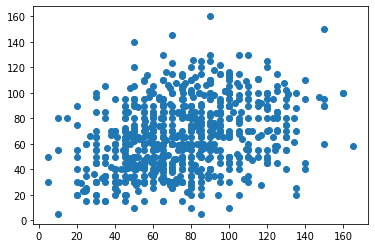

In [30]:
import matplotlib.pyplot as plt

plt.scatter(y=sub_df['speed'], x=sub_df['attack'])

plt.show()

27. Muestra las distintas generaciones que encontramos en el dataframe sub_df

In [31]:
sub_df['generation'].unique()

array([1, 2, 3, 4, 5, 6])